$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\ffud}[2]{\frac{\mathrm{d}^2 #1}{\mathrm{d} #2^2}}
\newcommand{\fffud}[2]{\frac{\mathrm{d}^3 #1}{\mathrm{d} #2^3}}
\newcommand{\ffffud}[2]{\frac{\mathrm{d}^4 #1}{\mathrm{d} #2^4}}
\newcommand{\dd}{\,\mathrm{d}}
$$

#  Sphere in a potential flow

In absence of viscosity we can formulate the pressure distribution around a sphere by employing potential flow theory and the Bernoulli equation. We have done the 2d potential flow around a cylinder and can easily expand it to 3-dimensional flow around a sphere. The distance from the origin is $r^2=x_1^2+x_2^2+x_3^2$. We can then write:

$$
\Phi_{Sphere}=\Phi_{Uniform flow}+\Phi_{Dipole}=
U_\infty x_3 + \frac{\kappa x_3}{\left(x_1^2+x_2^2+x_3^2\right)^{3/2}}\tag{1}
$$

The velocity components are calculated from $\vb{u}=\nabla \Phi:$

\begin{eqnarray}
u_1&=&-3\frac{\kappa x_1 x_3}{r^5}\tag{2a}\\
u_2&=&-3\frac{\kappa x_2 x_3}{r^5}\tag{2b}\\
u_3&=&U_\infty-3\frac{\kappa x_3^2}{r^5}+\frac{\kappa}{r^3}\tag{2c}\quad .
\end{eqnarray}

The radius of the sphere,$R$, can be determined from the position of the stagnation point, i.e.
$u_3=0$:

$$
R=\left(\frac{2\kappa}{U_\infty}\right)^{1/3}\tag{3}
$$

and we can write the velocity potential

$$
\Phi_{Sphere}=U_\infty x_3\left[1 + 
\frac{R^3}{2\left(x_1^2+x_2^2+x_3^2\right)^{3/2}}
\right]\tag{4}
$$

and the velocities are

\begin{eqnarray}
u_1&=&-U_\infty\frac{3 R^3 x_1 x_3}{2 r^5}\tag{5a}\\
u_2&=&-U_\infty\frac{3 R^3 x_2 x_3}{2 r^5}\tag{5b}\\
u_3&=&U_\infty\left(1-\frac{3 R^3 x_3^2}{2 r^5}+\frac{R^3}{2r^3}\right)\tag{5c}
\end{eqnarray}


In [2]:
%matplotlib inline 
from scipy.special import erf 
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma #for the masked array
import math
from ipywidgets import interact
import ipywidgets as widgets

xstart=-3
xend=3 #start of grid in x2 and x3-direction
steps=20 #number of gridpoints
h=(xend-xstart)/(steps-1.) #gridspacing
phi=np.linspace(0.,2.*np.pi,100)
x2=np.linspace(xstart,xend,steps)
x3=np.linspace(xstart,xend,steps)
xx3,xx2=np.mgrid[xstart:xend:steps*1j,xstart:xend:steps*1j] #generate two grids (note the return order yy,xx)

def plotstokessphere(R):

    U=1.
    r=np.sqrt(xx3**2+xx2**2)
    
    #there may be errors generated by the 1/r terms, let's ignore them
    np.seterr(divide='ignore', invalid='ignore')
    
    u2=-U*1.5*(R**3.)*xx2*xx3/(2*r**5.)
    u3=U*(1.-1.5*(R**3.)*(xx3**2)/(r**5)+R**3/(2*r**3))
    
    #We used masked arrays not to plot inside the sphere
    M = np.zeros(u2.shape, dtype=bool) 
    M[np.where(r<R)]=True
    u2=ma.masked_array(u2, mask=M)
    u3=ma.masked_array(u3, mask=M)
    
    uu = np.sqrt(u2**2+u3**2) #speed
    lw = (uu/uu.max()*2)**2. #scaled linewidth (thinner is slower)
    
    plt.figure(figsize=(7,7))
    #vector plot  
    plt.quiver(xx2,xx3,u2,u3,angles='xy')
    #sphere
    plt.plot(R*np.cos(phi),R*np.sin(phi),'k',linewidth=5)
    #streamline
    plt.streamplot(xx2,xx3,u2,u3, linewidth=lw, color=uu,cmap=plt.cm.plasma)

    plt.xlabel(r'$x_2$ (m)',size=18);plt.ylabel(r'$x_3$ (m)',size=18)
    plt.tick_params(labelsize=15)
    plt.axis([xstart,xend,xstart,xend])

interact(plotstokessphere, R=widgets.FloatSlider(min=.1,max=2,step=.1,value=1.5,\
                                            description='radius (m)'));


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuNSwgZGVzY3JpcHRpb249dSdyYWRpdXMgKG0pJywgbWF4PTIuMCwgbWluPTAuMSksIE91dHB1dCgpKSwgX2RvbV9jbGHigKY=


## Pressure distribution

Now let's calculate the pressure distribution around the sphere. From the steady Bernoulli equation we can solve for the pressure on the sphere 

$$
\frac{1}{2}\rho u^2 + p(r=R,\theta)=\frac{1}{2}\rho U_\infty^2\tag{6}
$$

where we arbitrarely set the pressure at $r\rightarrow\infty$ to zero.

On the sphere surface we have $r=R$, $x_2=R\sin\theta$, $x_3=R\cos\theta$ with $0^\circ<\theta<180^\circ$, see Fig. 1 in this [notebook](19_Stokes Sphere.ipynb). Thus is $180^\circ$ is the side facing the flow (upstream) and $0^\circ$ is downstream.

We now study the pressure distribution on the sphere only in the $x_1=0$ plane. Then 
$u^2=u_2^2+u_3^2$ and we obtain

$$u_2^2=\frac{9}{4}U_\infty^2 \cos^2\theta \sin^2\theta$$
and 
$$u_3^2=\frac{9}{4}U_\infty^2 \sin^4\theta\quad,$$
which leads to 

$$u^2=\frac{9}{4}U_\infty\sin^2\theta\tag{7}$$

Inserting Eq. (7) into the Bernoulli Eq. (6) and solving for $p$ we obtain

$$
C_p=\frac{p(\theta,R)}{\frac{1}{2}\rho U_\infty^2}=1-\frac{9}{4}\sin^2\theta\tag{8}\quad .
$$

This pressure coefficient, $C_p$, is a pressure made non-dimensional with respect to the stagnation pressure. It is plotted below. From that plot is clear that the integral of the pressure over the surface of the sphere is 0. 


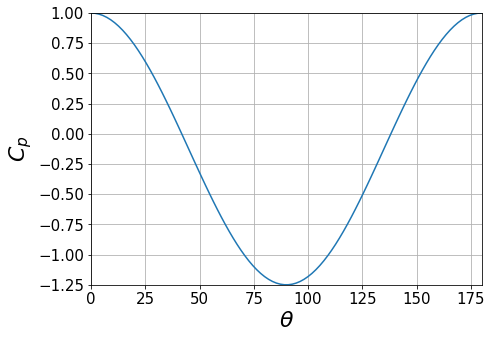

In [4]:
theta=np.linspace(0,np.pi,100)
Cp=1.-9./4.*(np.sin(theta))**2.
plt.figure(figsize=(7,5))
plt.plot(theta*180/np.pi,Cp)
plt.xlabel(r'$\theta$',size=22);plt.ylabel(r'$C_p$',size=22)
plt.tick_params(labelsize=15)
plt.axis([0,180,-5./4.,1])
plt.grid(True);

We can explicitely derive this with $\dd S=\pi R^2 \sin\theta \dd \theta$ as

\begin{eqnarray}
F_{pd}&=&\frac{1}{2}\rho U_\infty\int\int_S\left(1-\frac{9}{4}\sin^2\theta\right)\cos\theta \dd S\tag{9a}\\
&=& \rho\pi U_\infty^2 R^2 \int_0^\pi \left(\cos\theta\sin\theta-\sin^3\theta\cos\theta \right)\dd \theta\tag{9b}\\ 
&=& -\rho\pi U_\infty^2 R^2 \frac{1}{4}\left.\cos^4\theta\right|_{0}^\pi=0 \tag{9c}
\end{eqnarray}

Thus the potential flow around a sphere does not lead to a pressure drag (or in technial jargon: form drag).

In contrast in viscous flow we have 

$$
p(r=R,\theta)=-\frac{3}{2}\frac{\mu U_\infty}{R}\cos \theta\tag{10}
$$

The pressure induced drag is then

\begin{eqnarray}
F_{pd}&=&\int\int_S -p \cos\theta \dd S=\frac{3}{2}\mu \frac{U_\infty}{R}\int\int_S\cos^2\theta \dd S\tag{11a}\\
&=&3\pi\mu U_\infty R\int_0^\pi \cos^2\theta\sin\theta \dd \theta\tag{11b}\\
&=&3\pi\mu U_\infty R \left(\left.-\frac{1}{3}\cos^3\theta\right|_0^\pi\right)\tag{11c}\\
&=&2\pi\mu U_\infty R\tag{11d}\quad .
\end{eqnarray}

Therefore the pressure drag for the sphere does not vanish in a viscous fluid and it is $1/3$ of the total drag. 

In [9]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom2.css", "r").read()
    return HTML(styles)
css_styling()